## Observations and Insights 

Ramicane and Capomulin have a similar outcome on tumor size in this sample testing.

Capomulin has a strong negitive coralation with tumor size over time.

Both Ramicane and Capomulin had the most test data and they performed the best, would have expected the data points to be more even across all the drugs.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
Number_of_mice = len(pd.unique(mouse_df['Mouse ID']))
Number_of_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_df[mouse_df['Mouse ID'] != "g989"]
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(pd.unique(clean_mouse['Mouse ID']))
clean_num_mice

248

In [7]:
(clean_mouse['Drug Regimen'].unique)

<bound method Series.unique of 0       Ramicane
1       Ramicane
2       Ramicane
3       Ramicane
4       Ramicane
          ...   
1888    Naftisol
1889    Naftisol
1890    Naftisol
1891    Naftisol
1892    Naftisol
Name: Drug Regimen, Length: 1880, dtype: object>

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_clean_mouse = clean_mouse.groupby('Drug Regimen')
grouped_clean_mouse.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [9]:
clean_mouse_mean = grouped_clean_mouse["Tumor Volume (mm3)"].mean()
clean_mouse_median = grouped_clean_mouse["Tumor Volume (mm3)"].median()
clean_mouse_variance = grouped_clean_mouse["Tumor Volume (mm3)"].var()
clean_mouse_std = grouped_clean_mouse["Tumor Volume (mm3)"].std()
clean_mouse_sem = grouped_clean_mouse["Tumor Volume (mm3)"].sem()

In [10]:
drug_summary = pd.DataFrame({
    "Tumor Volume Mean":clean_mouse_mean,
    "Tumor Volume Mean":clean_mouse_mean,
    "Tumor Volume Variance":clean_mouse_variance,
    "Tumor Volume STD":clean_mouse_std,
    "Tumor Volume SEM":clean_mouse_sem
})
drug_summary

,Tumor Volume Mean,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_clean_mouse.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

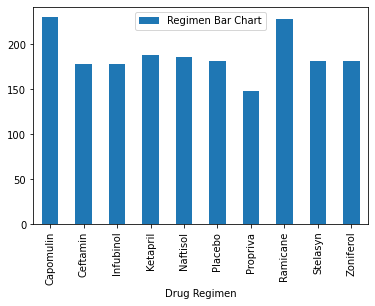

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_num = grouped_clean_mouse['Drug Regimen'].count()

regimen_bar = pd.DataFrame({"Regimen Bar Chart":regimen_num})

drug_names = regimen_bar.index.values

panda_bar = regimen_bar.plot.bar()

plt.show()

# Special thanks to Matt M for helping with this code.

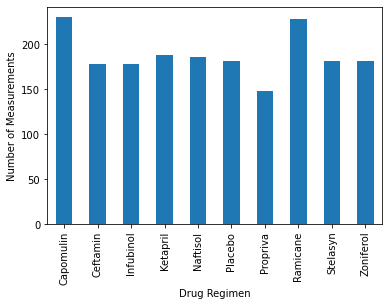

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count_drugs = clean_mouse.groupby('Drug Regimen')

count_drugs_group = count_drugs['Drug Regimen'].count()

# count_drugs_group

count_chart = count_drugs_group.plot(kind='bar')

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Measurements")


plt.show()
plt.tight_layout()

In [14]:
clean_mouse_sex = clean_mouse["Sex"].value_counts()
clean_mouse_sex

Male      958
Female    922
Name: Sex, dtype: int64

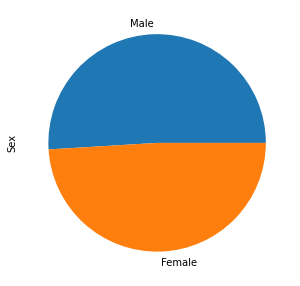

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# clean_mouse_sex = clean_mouse["Sex"].value_counts()

# clean_mouse_male = clean_mouse.loc[clean_mouse["Sex"] == "Male"]
# clean_mouse_female = clean_mouse.loc[clean_mouse["Sex"] == "Female"]
# clean_mouse

plot = clean_mouse_sex.plot.pie(y='Sex', figsize=(5, 5))

C:\Users\littl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


([<matplotlib.patches.Wedge at 0x1b4388e3748>,
 [Text(-1.1749678692382497, -0.24382474496598455, 'Males'),
  Text(1.0770538801350624, 0.22350601621881855, 'Females')],
 [Text(-0.6853979237223123, -0.14223110123015764, '51.0%'),
  Text(0.5874839346191248, 0.12191237248299192, '49.0%')])

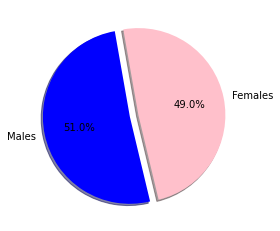

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# # Labels for the sections of our pie chart
labels = ["Males", "Females"]

# The values of each section of the pie chart
sizes = [clean_mouse_sex]

# The colors of each section of the pie chart
colors = ["blue", "pink"]

# Tells matplotlib to seperate the "Male" section from the others
explode = (0.1, 0,)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cleaned_mouse_sort =  clean_mouse.sort_values(by=['Timepoint'])
# Start by getting the last (greatest) timepoint for each mouse
cleaned_mouse_sort_drugdropped = cleaned_mouse_sort.loc[cleaned_mouse_sort['Drug Regimen'].isin(['Ceftamin',
                                                                  'Ramicane','Infubinol','Capomulin'])]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = cleaned_mouse_sort_drugdropped.drop_duplicates(subset=['Mouse ID'], keep='last')

tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
449,w678,Ramicane,Female,5,24,5,43.166373,0
...,...,...,...,...,...,...,...,...
370,s710,Capomulin,Female,1,23,45,40.728578,1
380,l509,Capomulin,Male,17,21,45,41.483008,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = tumor_volume['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {}

ceftamin_tumor_volume = tumor_volume[(tumor_volume['Drug Regimen'] == 'Ceftamin')]
ceftamin_tumor_vol_list = ceftamin_tumor_volume['Tumor Volume (mm3)']

ramicane_tumor_volume = tumor_volume[(tumor_volume['Drug Regimen'] == 'Ramicane')]
ramicane_tumor_vol_list = ramicane_tumor_volume['Tumor Volume (mm3)']

infubinol_tumor_volume = tumor_volume[(tumor_volume['Drug Regimen'] == 'Infubinol')]
infubinol_tumor_vol_list = infubinol_tumor_volume['Tumor Volume (mm3)']

capomulin_tumor_volume = tumor_volume[(tumor_volume['Drug Regimen'] == 'Capomulin')]
capomulin_tumor_vol_list = capomulin_tumor_volume['Tumor Volume (mm3)']
    
drug_regimen_tumor_data = [ceftamin_tumor_vol_list,ramicane_tumor_vol_list,
                           infubinol_tumor_vol_list,capomulin_tumor_vol_list]

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

ceftamin_quartiles = ceftamin_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftamin_lower_quantile = ceftamin_quartiles[0.25]
ceftamin_upper_quantile = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upper_quantile-ceftamin_lower_quantile


ramicane_quartiles = ramicane_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramicane_lower_quantile = ramicane_quartiles[0.25]
ramicane_upper_quantile = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upper_quantile-ramicane_lower_quantile


infubinol_quartiles = infubinol_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infubinol_lower_quantile = infubinol_quartiles[0.25]
infubinol_upper_quantile = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upper_quantile-infubinol_lower_quantile


capomulin_quartiles = capomulin_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomulin_lower_quantile = capomulin_quartiles[0.25]
capomulin_upper_quantile = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upper_quantile-capomulin_lower_quantile
    

In [20]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
ceftamin_lower_bound = ceftamin_lower_quantile - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upper_quantile + (1.5*ceftamin_iqr)

ramicane_lower_bound = ramicane_lower_quantile - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upper_quantile + (1.5*ramicane_iqr)

infubinol_lower_bound = infubinol_lower_quantile - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upper_quantile + (1.5*infubinol_iqr)

capomulin_lower_bound = capomulin_lower_quantile - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upper_quantile + (1.5*capomulin_iqr)

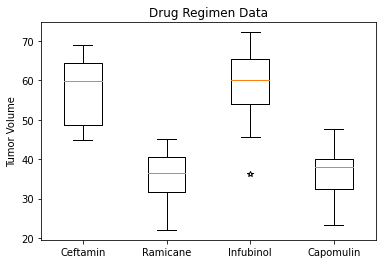

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

ax1.set_xticklabels(['Ceftamin', 'Ramicane', 'Infubinol', 'Capomulin'])
ax1.set_ylabel("Tumor Volume")
ax1.set_title("Drug Regimen Data")
ax1.boxplot(drug_regimen_tumor_data, 0, '*')
plt.show()

## Line and Scatter Plots

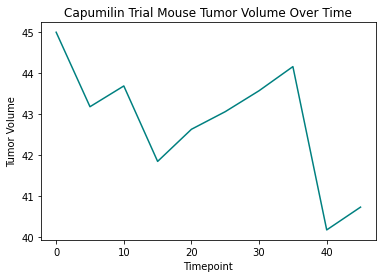

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capumulin = cleaned_mouse_sort_drugdropped[(cleaned_mouse_sort_drugdropped['Drug Regimen'] == 'Capomulin')]
capumulin_s710 = capumulin[(capumulin['Mouse ID'] == 's710')]
capomulin_s710_tumor_volume = capumulin_s710['Tumor Volume (mm3)']
capomulin_s710_timepoint = capumulin_s710['Timepoint']

capomulin_tumor_volume = plt.plot(capomulin_s710_timepoint, capomulin_s710_tumor_volume, color='teal', label='Tumor Volume')
plt.title('Capumilin Trial Mouse Tumor Volume Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

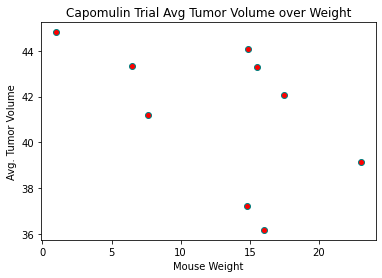

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capumulin_groupedby_weight = capumulin.groupby(['Weight (g)']).mean()


capomulin_groupedby_weight_tumor_volume = capumulin_groupedby_weight['Tumor Volume (mm3)']
capomulin_groupedby_weight_weight = capumulin_groupedby_weight.iloc[:,0]

plt.scatter(capomulin_groupedby_weight_weight,capomulin_groupedby_weight_tumor_volume, facecolors='red', edgecolors='teal')
plt.title('Capomulin Trial Avg Tumor Volume over Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg. Tumor Volume')
plt.show

## Correlation and Regression

The correlation between weight and average tumor volume is -0.52


<function matplotlib.pyplot.show(*args, **kw)>

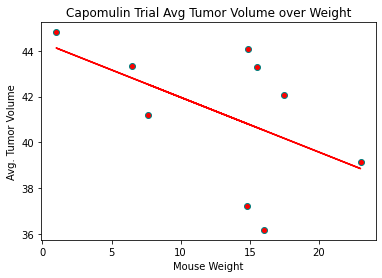

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_groupedby_weight_weight,
                                                           capomulin_groupedby_weight_tumor_volume)
correlation = st.pearsonr(capomulin_groupedby_weight_weight,capomulin_groupedby_weight_tumor_volume)

plt.scatter(capomulin_groupedby_weight_weight,capomulin_groupedby_weight_tumor_volume, facecolors='red', edgecolors='teal')
plt.title('Capomulin Trial Avg Tumor Volume over Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg. Tumor Volume')
regress_values = capomulin_groupedby_weight_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(capomulin_groupedby_weight_weight,regress_values,"r-")
print(f'The correlation between weight and average tumor volume is {round(correlation[0],2)}')
plt.show

In [25]:
# Very special thanks to Matt M for working with me to better understand what was being asked of me.  
# Understanding the logic behind these arguments has made it easier to complete the homework to a point that I am happy enough with.